In [3]:
import fastbook
from fastbook import load_learner
from fastai.vision.all import *
fastbook.setup_book()

import pathlib
plt = platform.system()
if plt == 'Linux': pathlib.WindowsPath = pathlib.PosixPath

In [9]:
bone_options = 'Human', 'Non-human'
path = Path('bones')
fns = get_image_files(path)

In [5]:
failed = verify_images(fns)

In [10]:
pattern = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=1234),
    get_y=parent_label,
    item_tfms=Resize(128))

In [11]:
bones = pattern.new(item_tfms=RandomResizedCrop(224, min_scale=0.3), batch_tfms=aug_transforms())
dls = bones.dataloaders(path)

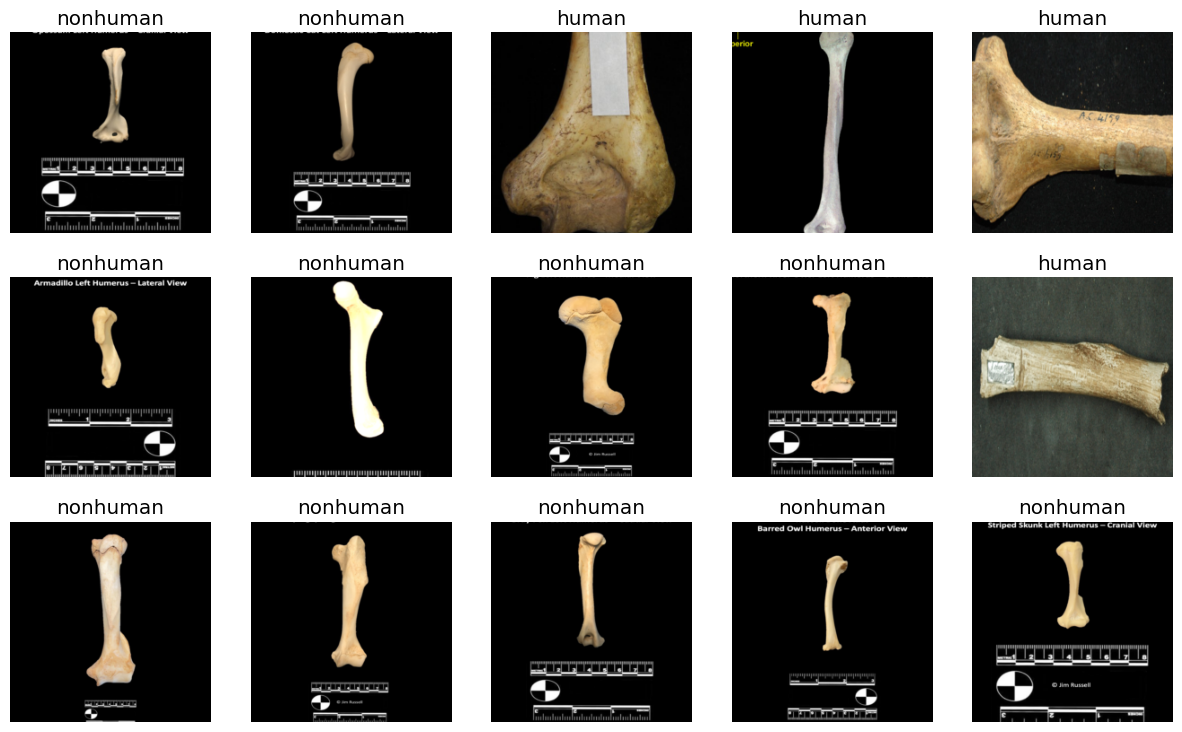

In [12]:
dls.valid.show_batch(max_n=15, nrows=3)

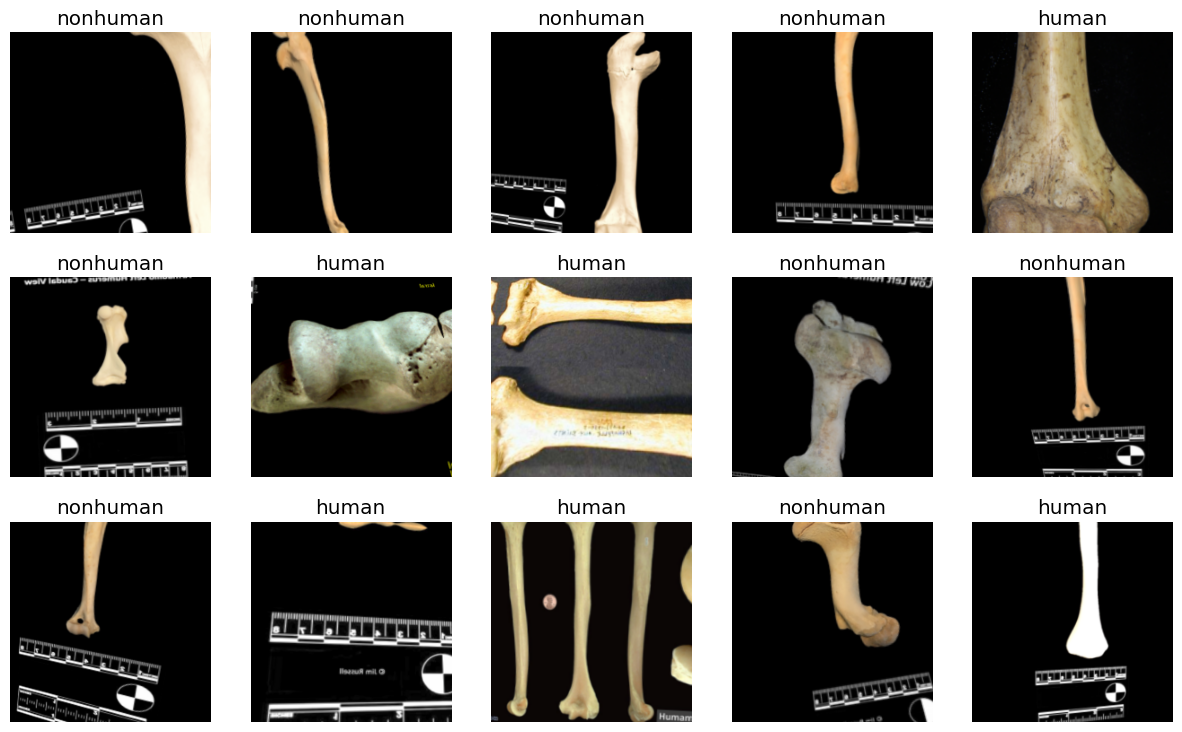

In [13]:
dls.train.show_batch(max_n=15, nrows=3)

In [14]:
dls.vocab

['human', 'nonhuman']

In [18]:
learner = vision_learner(dls, resnet34, metrics = error_rate, lr = 0.0012022644514217973)

SuggestedLRs(valley=0.0012022644514217973)

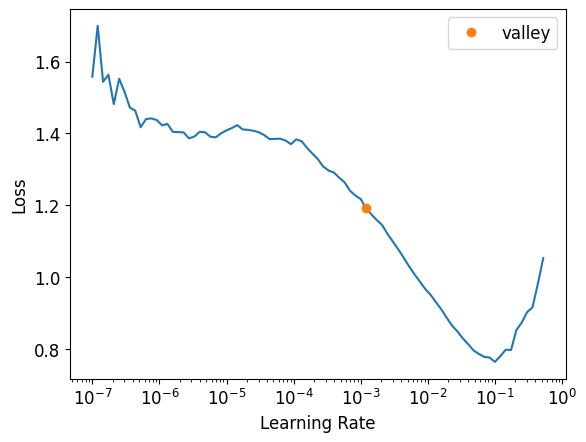

In [17]:
learner.lr_find()

In [19]:
learner.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.194320,2.212401,0.714286,00:03


epoch,train_loss,valid_loss,error_rate,time
0,1.425493,1.609066,0.428571,00:04
1,1.403382,1.171595,0.333333,00:04
2,1.315900,0.874986,0.285714,00:04
3,1.259453,0.611200,0.285714,00:04
4,1.236337,0.389248,0.238095,00:04
5,1.173559,0.268183,0.142857,00:04
6,1.063444,0.206319,0.095238,00:04
7,0.983146,0.192052,0.047619,00:04
8,0.935465,0.207359,0.047619,00:04
9,0.889673,0.251621,0.047619,00:04


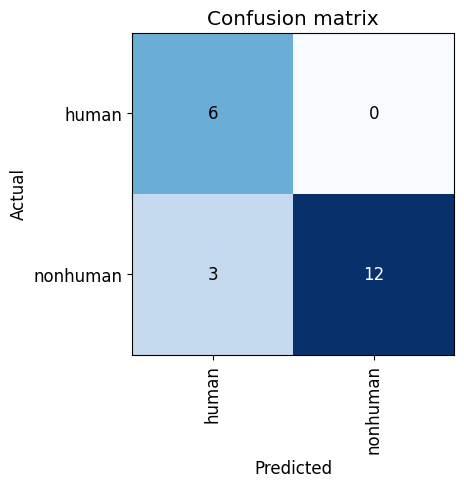

In [20]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

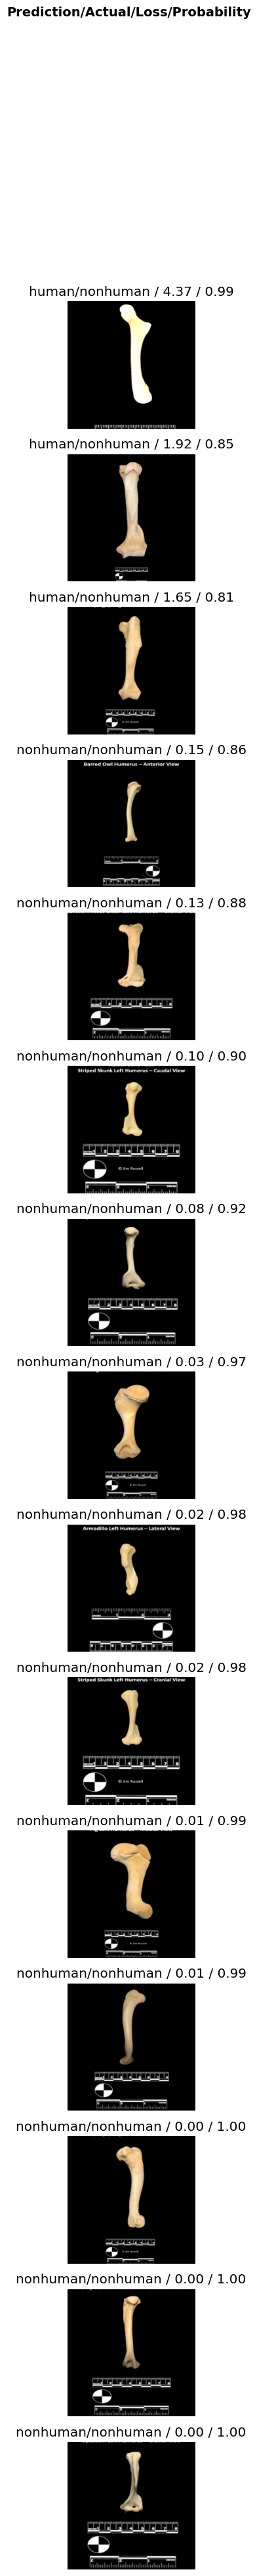

In [21]:
interp.plot_top_losses(15, nrows=15)

In [30]:
is_human,_,probs = learner.predict(PILImage.create(r'test images\test deer.jpg'))
print(f"This is a: {is_human}.")
print(f"Probability: {probs[0]:.4f}")

This is a: human.
Probability it's a human: 0.9998
